In [13]:
conda install -c conda-forge xlsxwriter


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/geo_env

  added / updated specs:
    - xlsxwriter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlsxwriter-3.2.2           |     pyhd8ed1ab_0         124 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         124 KB

The following NEW packages will be INSTALLED:

  xlsxwriter         conda-forge/noarch::xlsxwriter-3.2.2-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
from datetime import datetime

# 1. Ürün Listesi Oluşturma
product_names = ["Telefon", "Televizyon", "Bilgisayar", "Kamera", "Buzdolabı", 
                 "Çamaşır Makinesi", "Kombi", "Klima", "Beyaz Eşya", "Mikrodalga"]
prices = [1500, 2999, 4500, 1200, 3500, 2200, 5000, 9000, 1800, 1400]
sales_dates = ["01.01.2024", "05.05.2024", "15.03.2024", "22.07.2024", "10.09.2024",
               "28.10.2024", "14.11.2024", "01.02.2024", "08.04.2024", "25.12.2024"]

# Convert sales_dates to datetime format
sales_dates = [datetime.strptime(date, "%d.%m.%Y") for date in sales_dates]

# Create DataFrame
df = pd.DataFrame({
    'Ürün Adı': product_names,
    'Fiyat': prices,
    'Satış Tarihi': sales_dates
})

# 2. Veri Doğrulama Uygulaması

# Save to Excel file with data validation
file_path = '/Users/canyonder/Desktop/urun_listem.xlsx'  # Correct path

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df.to_excel(writer, index=False, sheet_name='Ürün Listesi')

    # Get the workbook and worksheet objects
    workbook  = writer.book
    worksheet = writer.sheets['Ürün Listesi']
    
    # 2a. Veri Doğrulama: Fiyatlar için 100 ile 10000 arasında olma
    worksheet.data_validation('B2:B11', {'validate': 'integer',
                                         'criteria': 'between', 
                                         'minimum': 100, 
                                         'maximum': 10000,
                                         'input_message': 'Fiyat 100 ile 10000 arasında olmalı.'})
    
    # 2b. Veri Doğrulama: Tarihler için geçerli tarih girişi
    worksheet.data_validation('C2:C11', {'validate': 'date',
                                         'criteria': 'greaterthan', 
                                         'minimum': '1900-01-01',
                                         'input_message': 'Geçerli bir tarih giriniz.'})
    
    # 3. Formatlama: Fiyatlar için para birimi formatı ve tarih formatı
    worksheet.set_column('B:B', 12, workbook.add_format({'num_format': '#,##0.00 ₺'}))  # Fiyat formatı
    worksheet.set_column('C:C', 12, workbook.add_format({'num_format': 'dd.mm.yyyy'}))  # Tarih formatı

file_path  # Return the file path so the user can access the file



/opt/anaconda3/envs/geo_env/lib/python3.12/site-packages/xlsxwriter/worksheet.py:2662: UserWarning: Unknown criteria type 'greaterthan' for parameter 'criteria' in data_validation()
  warn(


'/Users/canyonder/Desktop/urun_listem.xlsx'

In [21]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
from openpyxl.utils import get_column_letter
from openpyxl.formatting.rule import ColorScale, CellIsRule
from openpyxl.drawing.image import Image

# Örnek veri oluşturma
data = {
    'Müşteri Adı': ['ahmet kaya', 'mehmet yilmaz', 'ayşe tekin', 'fatma can'],
    'Ödeme Tutarı': [1500, 2500, 3000, 4000],
    'Ödeme Şekli': ['kart', 'kart', 'nakit', 'kart'],
    'Durum': ['Tamamlandı', 'Beklemede', 'İptal', 'Tamamlandı'],
    'Tarih': ['2023-01-15', '2023-02-20', '2023-03-10', '2023-04-25']
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Excel dosyasını oluşturma
file_path = '/Users/canyonder/Desktop/urun_listesi_biçimlendirilmiş.xlsx'
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Müşteri Listesi')

# Workbook yükleme
wb = load_workbook(file_path)
ws = wb['Müşteri Listesi']

# 1. Başlıkları Düzenleme
for cell in ws[1]:
    cell.font = Font(bold=True)
    cell.fill = PatternFill(start_color='D3D3D3', end_color='D3D3D3', fill_type='solid')  # Gri dolgu
    cell.alignment = Alignment(horizontal='center', vertical='center')

# 2. Tarih Sütununu Düzenleme
for cell in ws['E'][1:]:  # Tarih sütunu
    cell.number_format = 'DD.MM.YYYY'

# 3. Müşteri İsimlerini Düzenleme
for cell in ws['A'][1:]:  # Müşteri Adı
    cell.value = cell.value.title()  # YAZIM.DÜZENİ fonksiyonu ile baş harfleri büyük yapma

# 4. Para Birimi Biçimlendirmesi
for cell in ws['B'][1:]:  # Ödeme Tutarı
    cell.number_format = '#,##0.00 ₺'
    cell.alignment = Alignment(horizontal='right')

# 5. Ödeme Şekli Sütununu Düzenleme
for cell in ws['C'][1:]:  # Ödeme Şekli
    if cell.value.lower() == 'kart':
        cell.value = 'Kredi Kartı'
    cell.alignment = Alignment(horizontal='left')

# 6. Durum Sütununu Düzenleme (Koşullu Biçimlendirme)
for row in ws.iter_rows(min_row=2, min_col=4, max_col=4):  # Durum sütunu
    for cell in row:
        if cell.value == 'Tamamlandı':
            cell.fill = PatternFill(start_color="90EE90", end_color="90EE90", fill_type="solid")  # Yeşil
        elif cell.value == 'Beklemede':
            cell.fill = PatternFill(start_color="FFFFE0", end_color="FFFFE0", fill_type="solid")  # Sarı
        elif cell.value == 'İptal':
            cell.fill = PatternFill(start_color="FFCCCB", end_color="FFCCCB", fill_type="solid")  # Kırmızı

# 7. Son Dokunuşlar
# Sütun genişliklerini otomatik ayarlama
for col in ws.columns:
    max_length = 0
    column = col[0].column_letter  # Kolon harfini al
    for cell in col:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(cell.value)
        except:
            pass
    adjusted_width = (max_length + 2)
    ws.column_dimensions[column].width = adjusted_width

# Tüm hücrelere kenarlık ekleme
for row in ws.iter_rows():
    for cell in row:
        cell.border = Border(left=Side(style='thin'),
                             right=Side(style='thin'),
                             top=Side(style='thin'),
                             bottom=Side(style='thin'))

# Alternatif satır renkleri
for i, row in enumerate(ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=ws.max_column)):
    if i % 2 == 0:
        for cell in row:
            cell.fill = PatternFill(start_color="F2F2F2", end_color="F2F2F2", fill_type="solid")  # Gri renk

# Yazı tipi olarak Calibri seçme
for row in ws.iter_rows():
    for cell in row:
        cell.font = Font(name='Calibri')

# Excel dosyasını kaydetme
wb.save(file_path)

print(f"Excel dosyası başarıyla kaydedildi: {file_path}")


Excel dosyası başarıyla kaydedildi: /Users/canyonder/Desktop/urun_listesi_biçimlendirilmiş.xlsx


In [23]:
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import Font
from openpyxl.utils import get_column_letter

# Excel dosyası oluşturma
wb = Workbook()
ws = wb.active
ws.title = "Görev"

# 1. Adım: Verileri hücrelere ekleyelim
data = [
    [10, 20, 30],
    [15, 25, 35],
    [5, 15, 25],
    [8, 18, 28],
    [7, 17, 27]
]

for row_idx, row in enumerate(data, 1):
    for col_idx, value in enumerate(row, 1):
        ws.cell(row=row_idx, column=col_idx, value=value)

# 2. Adım: Toplamları hesaplama ve hücrelere yazma
ws['A6'] = '=SUM(A1:A5)'
ws['B6'] = '=SUM(B1:B5)'
ws['C6'] = '=SUM(C1:C5)'

# 3. Adım: Ortalamaları hesaplama ve hücrelere yazma
ws['A7'] = '=AVERAGE(A1:A5)'
ws['B7'] = '=AVERAGE(B1:B5)'
ws['C7'] = '=AVERAGE(C1:C5)'

# 4. Adım: Koşullu toplama (A1:A5'teki 5'ten büyük sayıları toplama)
ws['A8'] = '=SUMIF(A1:A5, ">5")'

# 5. Adım: EĞER fonksiyonu kullanma
ws['D1'] = '=IF(B1>50, "Başarılı", "Başarısız")'

# 6. Adım: C1 hücresindeki değeri 2 ile çarp ve C2'ye yaz
ws['C2'] = '=C1*2'

# 7. Adım: C2 hücresindeki değeri, mutlak referansla $A$1 hücresindeki değerle çarp
ws['C3'] = '=$A$1*C2'

# 8. Adım: Hücrelere stil ekleme (bold yazı)
for cell in ws['A1:C1']:
    for c in cell:
        c.font = Font(bold=True)

# Excel dosyasını kaydetme
file_path = '/Users/canyonder/Desktop/gorev_excel_formulleri.xlsx'
wb.save(file_path)

print(f"Excel dosyası başarıyla kaydedildi: {file_path}")


Excel dosyası başarıyla kaydedildi: /Users/canyonder/Desktop/gorev_excel_formulleri.xlsx


In [29]:
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import Font

# Yeni bir Excel dosyası oluştur
wb = Workbook()
ws = wb.active
ws.title = "Satış Verileri"

# Başlıkları ekleyelim
headers = ["Ürün Adı", "Satış Tutarı", "Hedef Satış Tutarı", "Başarı Durumu", "Ürün-Satış Bilgisi"]
ws.append(headers)

# Örnek veri ekleyelim
data = [
    ["Telefon", 15000, 12000],
    ["Bilgisayar", 25000, 27000],
    ["Tablet", 12000, 10000],
    ["Kulaklık", 5000, 6000],
    ["Akıllı Saat", 8000, 7000]
]

for row in data:
    ws.append(row)

# Toplam Satış Hesaplama (Satış Tutarı Sütununun Altına)
total_row = len(data) + 2  # 2 satır başlık ve ilk veri satırları var
ws[f"B{total_row}"] = "=SUM(B2:B6)"
ws[f"B{total_row}"].font = Font(bold=True)
ws[f"A{total_row}"] = "Toplam Satış"

# Ortalama Satış Hesaplama (Bir alt satır)
ws[f"B{total_row+1}"] = "=AVERAGE(B2:B6)"
ws[f"B{total_row+1}"].font = Font(bold=True)
ws[f"A{total_row+1}"] = "Ortalama Satış"

# Başarı Durumu için EĞER fonksiyonu ekleme
for i in range(2, 7):  # Satır 2'den 6'ya kadar olan veriler için
    ws[f"D{i}"] = f'=IF(B{i}>=C{i}, "Başarılı", "Başarısız")'

# Ürün Adı ve Satış Tutarını birleştirme
for i in range(2, 7):
    ws[f"E{i}"] = f'=CONCATENATE(A{i}, " - ", TEXT(B{i}, "0"))'

# Hücreleri kalın yapma
for col in range(1, 6):
    ws.cell(row=1, column=col).font = Font(bold=True)

# Excel dosyasını kaydetme
file_path = '/Users/canyonder/Desktop/satis_verileri.xlsx'
wb.save(file_path)

print(f"Excel dosyası başarıyla oluşturuldu: {file_path}")


Excel dosyası başarıyla oluşturuldu: /Users/canyonder/Desktop/satis_verileri.xlsx


In [31]:
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import Font

# Yeni bir Excel dosyası oluştur
wb = Workbook()
ws = wb.active
ws.title = "Çalışan Satış Verileri"

# Başlıkları ekleyelim
headers = ["Ad", "Satış", "Yaş", "BÜYÜK HARF AD", "Ad - Yaş", "Tecrübe Durumu"]
ws.append(headers)

# Örnek veri ekleyelim
data = [
    ["Ali", 15000, 28],
    ["Ayşe", 20000, 35],
    ["Mehmet", 12000, 29],
    ["Fatma", 18000, 40],
    ["Ahmet", 25000, 32]
]

for row in data:
    ws.append(row)

# Toplam ve ortalama satış hesaplama
total_row = len(data) + 2  # Başlık ve veri satırları var
ws[f"B{total_row}"] = "=SUM(B2:B6)"
ws[f"B{total_row}"].font = Font(bold=True)
ws[f"A{total_row}"] = "Toplam Satış"

ws[f"B{total_row+1}"] = "=AVERAGE(B2:B6)"
ws[f"B{total_row+1}"].font = Font(bold=True)
ws[f"A{total_row+1}"] = "Ortalama Satış"

# En yüksek satış yapan kişinin satışını belirleme
ws[f"B{total_row+2}"] = "=MAX(B2:B6)"
ws[f"B{total_row+2}"].font = Font(bold=True)
ws[f"A{total_row+2}"] = "En Yüksek Satış"

# BÜYÜK HARFLE AD yazdırma
for i in range(2, 7):
    ws[f"D{i}"] = f"=UPPER(A{i})"

# "Ad - Yaş" sütunu oluşturma
for i in range(2, 7):
    ws[f"E{i}"] = f'=CONCATENATE(A{i}, " - ", C{i})'

# Tecrübe Durumu sütunu
for i in range(2, 7):
    ws[f"F{i}"] = f'=IF(C{i}>30, "Tecrübeli", "Genç")'

# DÜŞEYARA (VLOOKUP) Kullanımı
ws[f"H1"] = "Çalışan Adı Gir:"
ws[f"H2"] = "Ayşe"
ws[f"I1"] = "Satış Tutarı"
ws[f"I2"] = '=VLOOKUP(H2, A2:B6, 2, FALSE)'

# Başlıkları kalın yap
for col in range(1, 7):
    ws.cell(row=1, column=col).font = Font(bold=True)

# Excel dosyasını kaydetme
file_path = "/Users/canyonder/Desktop/calisan_satis_verileri.xlsx"
wb.save(file_path)

print(f"Excel dosyası başarıyla oluşturuldu: {file_path}")


Excel dosyası başarıyla oluşturuldu: /Users/canyonder/Desktop/calisan_satis_verileri.xlsx


In [1]:
!pip install seabor


In [38]:
conda install seaborn -n geo_env


Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/var/folders/9h/5yf2jhn502s0hw7k4yd9qlz80000gn/T/ipykernel_33757/545609673.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ürün Adı"].fillna("Bilinmiyor", inplace=True)  # Eksik ürün adı varsa "Bilinmiyor" yap
/var/folders/9h/5yf2jhn502s0hw7k4yd9qlz80000gn/T/ipykernel_33757/545609673.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

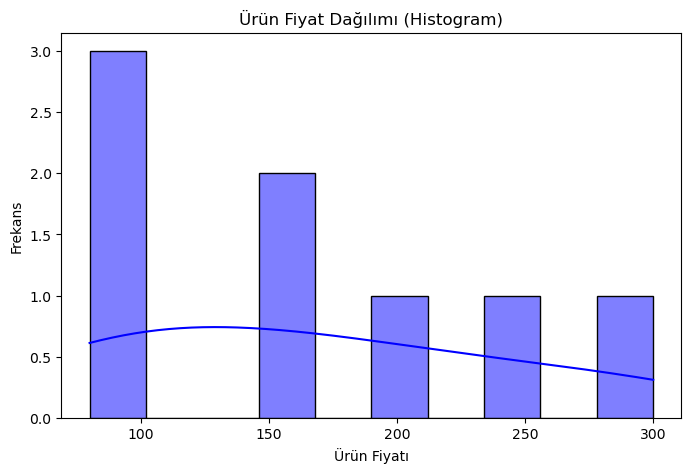

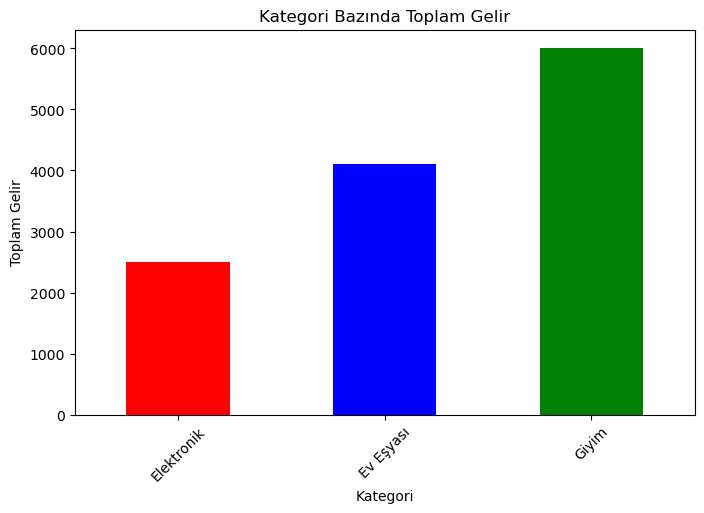

🔹 En yüksek toplam geliri elde eden kategori: Giyim
🔹 Ortalama müşteri değerlendirme puanı en yüksek olan kategori: Elektronik


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Örnek veri oluşturma
data = {
    "Ürün Adı": ["Ürün A", "Ürün B", "Ürün C", "Ürün D", "Ürün A", "Ürün E", "Ürün F", "Ürün G", np.nan],
    "Kategori": ["Elektronik", "Giyim", "Elektronik", "Ev Eşyası", "Elektronik", "Giyim", "Giyim", "Ev Eşyası", "Giyim"],
    "Fiyat": [150, 80, 200, 300, 150, 100, np.nan, 250, 90],
    "Satış Miktarı": [10, 20, 5, 7, 10, 15, 12, 8, 10],
    "Müşteri Puanı": [4.5, 3.8, 4.7, 4.2, 4.5, np.nan, 3.9, 4.0, 4.1]
}

# Veri çerçevesi oluşturma
df = pd.DataFrame(data)

### 📌 1. Veri Temizleme

# Yinelenen kayıtları kaldırma
df.drop_duplicates(inplace=True)

# Boş değerleri doldurma
df["Ürün Adı"].fillna("Bilinmiyor", inplace=True)  # Eksik ürün adı varsa "Bilinmiyor" yap
df["Fiyat"].fillna(df["Fiyat"].mean(), inplace=True)  # Eksik fiyatları ortalama fiyatla doldur
df["Müşteri Puanı"].fillna(df["Müşteri Puanı"].mean(), inplace=True)  # Eksik müşteri puanlarını ortalama ile doldur

### 📌 2. İstatistiksel Analiz

# Ürün Fiyatları Analizi
ortalama_fiyat = df["Fiyat"].mean()
medyan_fiyat = df["Fiyat"].median()
mod_fiyat = df["Fiyat"].mode()[0]

# Müşteri Puanları Analizi
ortalama_puan = df["Müşteri Puanı"].mean()
medyan_puan = df["Müşteri Puanı"].median()
mod_puan = df["Müşteri Puanı"].mode()[0]

### 📌 3. Veri Görselleştirme

# Histogram - Ürün fiyat dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(df["Fiyat"], bins=10, kde=True, color="blue")
plt.xlabel("Ürün Fiyatı")
plt.ylabel("Frekans")
plt.title("Ürün Fiyat Dağılımı (Histogram)")
plt.show()

# Sütun Grafiği - Kategori Bazında Toplam Gelir
df["Toplam Gelir"] = df["Fiyat"] * df["Satış Miktarı"]
kategori_gelir = df.groupby("Kategori")["Toplam Gelir"].sum()

plt.figure(figsize=(8, 5))
kategori_gelir.plot(kind="bar", color=["red", "blue", "green"])
plt.xlabel("Kategori")
plt.ylabel("Toplam Gelir")
plt.title("Kategori Bazında Toplam Gelir")
plt.xticks(rotation=45)
plt.show()

### 📌 4. Sonuç Çıkartma

# En yüksek toplam geliri elde eden kategori
en_yuksek_gelir_kategori = kategori_gelir.idxmax()

# Ortalama müşteri değerlendirme puanı en yüksek olan kategori
kategori_puan = df.groupby("Kategori")["Müşteri Puanı"].mean()
en_yuksek_puan_kategori = kategori_puan.idxmax()

# Sonuçları yazdırma
print(f"🔹 En yüksek toplam geliri elde eden kategori: {en_yuksek_gelir_kategori}")
print(f"🔹 Ortalama müşteri değerlendirme puanı en yüksek olan kategori: {en_yuksek_puan_kategori}")

### 📌 5. Excel Dosyası Olarak Kaydetme

# Excel dosyasının yolu
excel_path = "/Users/canyonder/Desktop/veri_analizi.xlsx"

# Excel'e yazma işlemi
df.to_excel(excel_path, index=False)


In [44]:
import pandas as pd

# Verileri oluşturma
data = {
    'Çalışan Adı': ['Ali Yılmaz', 'Ayşe Demir', 'Mehmet Kaya', 'Fatma Çelik', 'Emre Şahin', 'Zeynep Aydın', 'Hasan Koç', 
                    'Elif Yıldız', 'Murat Aslan', 'Selin Aksoy'],
    'Departman': ['IT', 'İnsan Kaynakları', 'IT', 'Satış', 'Finans', 'IT', 'Pazarlama', 'Satış', 'IT', 'İnsan Kaynakları'],
    'Pozisyon': ['Developer', 'Uzman', 'Sr. Developer', 'Temsilci', 'Analist', 'Jr. Developer', 'Uzman', 'Müdür', 'Developer', 'Temsilci'],
    'Maaş (TL)': [28, 22, 35, 18, 25, 20, 24, 40, 28.5, 19],
    'Performans Puanı': [4.6, 4.3, 4.8, 3.9, 4.0, 4.2, 3.7, 4.9, 4.5, 3.6],
    'İşe Başlama Tarihi': ['2024-05-15', '2024-03-10', '2023-11-01', '2024-01-20', '2023-08-15', '2024-02-01', '2023-12-01', 
                            '2022-09-15', '2024-01-05', '2023-11-20']
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# a) Performans Puanına Göre Filtreleme
filtered_performance = df[df['Performans Puanı'] >= 4.5]

# b) Maaşa Göre Sıralama
sorted_by_salary = filtered_performance.sort_values(by='Maaş (TL)', ascending=False)

# c) Tarih Filtreleme: Son 6 ayda işe alınanlar
recent_hires = df[df['İşe Başlama Tarihi'] >= '2023-09-24']

# d) Gelişmiş Filtre
advanced_filter = df[(df['Performans Puanı'] >= 4.0) & (df['Maaş (TL)'] > 25000)]

# Çıktılar
highest_paid_employee = sorted_by_salary.iloc[0][['Çalışan Adı', 'Maaş (TL)']]
recent_hires_names_departments = recent_hires[['Çalışan Adı', 'Departman']]
advanced_filter_results = advanced_filter[['Çalışan Adı', 'Departman', 'Pozisyon', 'Maaş (TL)', 'Performans Puanı']]

# Sonuçları Excel dosyasına kaydetme
output_path = '/Users/canyonder/Desktop/TechFit_IK_Analizi_Sonuclar.xlsx'
with pd.ExcelWriter(output_path) as writer:
    filtered_performance.to_excel(writer, sheet_name='Filtrelenmiş Performans', index=False)
    sorted_by_salary.to_excel(writer, sheet_name='Maaşa Göre Sıralama', index=False)
    recent_hires_names_departments.to_excel(writer, sheet_name='Son 6 Ayda İşe Alınanlar', index=False)
    advanced_filter_results.to_excel(writer, sheet_name='Gelişmiş Filtre', index=False)

# En yüksek maaşlı çalışan ve maaş bilgisi
highest_paid_employee


Çalışan Adı    Elif Yıldız
Maaş (TL)             40.0
Name: 7, dtype: object

In [46]:
import pandas as pd
import openpyxl

# Load the data
data = {
    "Sales Representative": ["Ayşe Yılmaz", "Mehmet Demir", "Zeynep Kaya", "Ahmet Can", "Ayşe Yılmaz", 
                             "Zeynep Kaya", "Ahmet Can", "Mehmet Demir", "Ayşe Yılmaz", "Zeynep Kaya"],
    "Region": ["İstanbul", "Ankara", "İzmir", "İstanbul", "İzmir", 
               "Ankara", "İstanbul", "İzmir", "Ankara", "İstanbul"],
    "Product Category": ["Spor Ayakkabı", "Koşu Ayakkabısı", "Bisiklet", "Koşu Ayakkabısı", "Spor Ayakkabı", 
                         "Bisiklet", "Spor Ayakkabı", "Koşu Ayakkabısı", "Bisiklet", "Koşu Ayakkabısı"],
    "Product Name": ["TechFit 3000", "SpeedRun 500", "RoadMaster X", "SpeedRun 500", "TechFit 3000", 
                     "RoadMaster X", "TechFit 3000", "SpeedRun 500", "RoadMaster X", "SpeedRun 500"],
    "Sales Amount": [5000, 3000, 4000, 4500, 5500, 3000, 6000, 3500, 4500, 4000],
    "Profit Rate": [0.2, 0.15, 0.25, 0.18, 0.2, 0.25, 0.22, 0.16, 0.24, 0.18],
    "Sales Date": ["01.01.2024", "01.02.2024", "01.02.2024", "01.03.2024", "01.03.2024", 
                   "01.04.2024", "01.04.2024", "01.05.2024", "01.05.2024", "01.06.2024"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Sales Date' to datetime
df['Sales Date'] = pd.to_datetime(df['Sales Date'], format='%d.%m.%Y')

# Create the Pivot Table
pivot_table = pd.pivot_table(df, 
                             index='Sales Representative', 
                             columns='Region', 
                             values=['Sales Amount', 'Profit Rate'], 
                             aggfunc={'Sales Amount': 'sum', 'Profit Rate': 'mean'})

# Group by Year (from 'Sales Date')
df['Year'] = df['Sales Date'].dt.year
pivot_table['Year'] = df.groupby('Sales Representative')['Year'].max()  # Add year for each sales rep

# Save the result as an Excel file
file_path = '/Users/canyonder/Desktop/TechFit_Sales_Pivot_Analysis.xlsx'
pivot_table.to_excel(file_path)

file_path


'/Users/canyonder/Desktop/TechFit_Sales_Pivot_Analysis.xlsx'

In [48]:
import pandas as pd

# Sample data (you should replace this with actual sales data)
data = {
    "Ürün": ["Yemek Masası", "Gardırop", "Çamaşır Makinesi", "Köşe Takımı", "Yatak Odası", "Bulaşık Makinesi"],
    "Geliş Fiyatı": [1000, 1200, 800, 1500, 2000, 900],
    "Kar Oranı": [0.2, 0.15, 0.18, 0.1, 0.25, 0.2],
    "Satış Adedi": [10, 8, 12, 5, 6, 15],
    "Taksit Sayısı": [12, 6, 9, 12, 6, 18],
    "Peşinat Tutarı": [500, 600, 300, 700, 800, 450],
    "İskonto": [0, 0, 0.05, 0, 0.05, 0]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# 1. Satış Analizi: Calculate sales price, total price, discount, and new total
df['Satış Fiyatı'] = df['Geliş Fiyatı'] * (1 + df['Kar Oranı'])
df['Toplam Tutar'] = df['Satış Fiyatı'] * df['Satış Adedi']
df['İskonto Tutarı'] = df['Toplam Tutar'] * df['İskonto']
df['İskontolu Toplam Tutar'] = df['Toplam Tutar'] - df['İskonto Tutarı']

# 2. Ödeme Takibi: Calculate total payment, remaining payment, and installment amount
df['Ödemeler Toplamı'] = df['Peşinat Tutarı'] + (df['Taksit Sayısı'] * 0)  # assuming zero for down payment for installment sales
df['Kalan Ödeme'] = df['İskontolu Toplam Tutar'] - df['Ödemeler Toplamı']
df['Taksit Tutarı'] = df['Kalan Ödeme'] / df['Taksit Sayısı']

# 3. Satış İstatistikleri: Peşin/Taksitli satış sayı
peşin_satis_sayisi = df[df['Taksit Sayısı'] == 0].shape[0]
taksitli_satis_sayisi = df[df['Taksit Sayısı'] > 0].shape[0]

# 4. Performans Analizi: Highest and lowest discount, max deposit, and profit margin
highest_discount = df['İskonto'].max()
lowest_discount = df['İskonto'].min()
highest_deposit = df['Peşinat Tutarı'].max()
df['Kar Marjı'] = (df['Satış Fiyatı'] - df['Geliş Fiyatı']) / df['Geliş Fiyatı'] * 100
highest_profit_margin = df['Kar Marjı'].max()
lowest_profit_margin = df['Kar Marjı'].min()

# 5. Veri Doğrulama: (Demonstration of unique products list, as data validation is a UI feature in Excel)
unique_products = df['Ürün'].unique()

# Saving to Excel
file_path = "/Users/canyonder/Desktop/satis_analizi.xlsx"

with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Satış Verisi', index=False)
    
    # Creating a sheet for performance analysis
    performance_data = {
        "En Yüksek İskonto": [highest_discount],
        "En Düşük İskonto": [lowest_discount],
        "En Yüksek Peşinat": [highest_deposit],
        "En Yüksek Kar Marjı": [highest_profit_margin],
        "En Düşük Kar Marjı": [lowest_profit_margin],
        "Peşin Satış Sayısı": [peşin_satis_sayisi],
        "Taksitli Satış Sayısı": [taksitli_satis_sayisi]
    }
    
    performance_df = pd.DataFrame(performance_data)
    performance_df.to_excel(writer, sheet_name='Performans Analizi', index=False)
    
    # Adding unique products list
    unique_df = pd.DataFrame(unique_products, columns=['Benzersiz Ürünler'])
    unique_df.to_excel(writer, sheet_name='Ürün Listesi', index=False)

print(f"Excel dosyanız başarıyla {file_path} yoluna kaydedildi.")


Excel dosyanız başarıyla /Users/canyonder/Desktop/satis_analizi.xlsx yoluna kaydedildi.


In [50]:
import openpyxl
from openpyxl.chart import BarChart, Reference

# Create a new workbook and add a sheet
wb = openpyxl.Workbook()
sheet = wb.active
sheet.title = "Sales Data"

# Add headers to the columns
headers = ["Product Name", "Sales Quantity", "Unit Price", "Total"]
sheet.append(headers)

# Example data (you can replace this with your own data)
data = [
    ("TechFit 3000", 50, 100),
    ("SpeedRun 500", 30, 120),
    ("RoadMaster X", 20, 150),
    ("UltraBike 2000", 15, 200),
    ("SpeedMax 400", 25, 180)
]

# Add data to the sheet
for row in data:
    sheet.append(row)

# Add formula for the 'Total' column (D column)
for row in range(2, 7):
    sheet[f"D{row}"] = f"=B{row}*C{row}"

# Add formula for total sales quantity (SUM formula)
sheet["B7"] = "=SUM(B2:B6)"
sheet["A7"] = "Total Sales Quantity"

# Create a bar chart
chart = BarChart()
chart.type = "col"
chart.style = 10
chart.title = "Sales Data"
chart.x_axis.title = "Product Name"
chart.y_axis.title = "Sales Quantity"

# Add data to the chart
data = Reference(sheet, min_col=2, min_row=1, max_row=6, max_col=2)
categories = Reference(sheet, min_col=1, min_row=2, max_row=6)
chart.add_data(data, titles_from_data=True)
chart.set_categories(categories)

# Place the chart on the sheet
sheet.add_chart(chart, "E2")

# Save the workbook to the desktop
file_path = '/Users/canyonder/Desktop/Sales_Data_with_Chart.xlsx'
wb.save(file_path)

file_path


'/Users/canyonder/Desktop/Sales_Data_with_Chart.xlsx'